## Tugas: Eksperimen HDBSCAN

Lakukan eksperimen clustering dengan HDBSCAN menggunakan dataset yang Anda pilih. Lakukan hal berikut:

1. Load dan eksplorasi dataset
2. Lakukan preprocessing jika diperlukan (normalisasi, dll)
3. Jalankan HDBSCAN dengan berbagai parameter
4. Evaluasi hasil menggunakan Silhouette Score dan Davies-Bouldin Index
5. Visualisasikan hasil clustering
6. Bandingkan dengan DBSCAN atau K-Means

TUGAS: EKSPERIMEN HDBSCAN

1. LOAD DAN EKSPLORASI DATASET
--------------------------------------------------------------------------------
Dataset: make_moons
Jumlah sampel: 1000
Jumlah fitur: 2
True classes: 2

2. PREPROCESSING
--------------------------------------------------------------------------------
Data telah dinormalisasi dengan StandardScaler
Mean: [-2.53075338e-16 -3.20854454e-16]
Std: [1. 1.]


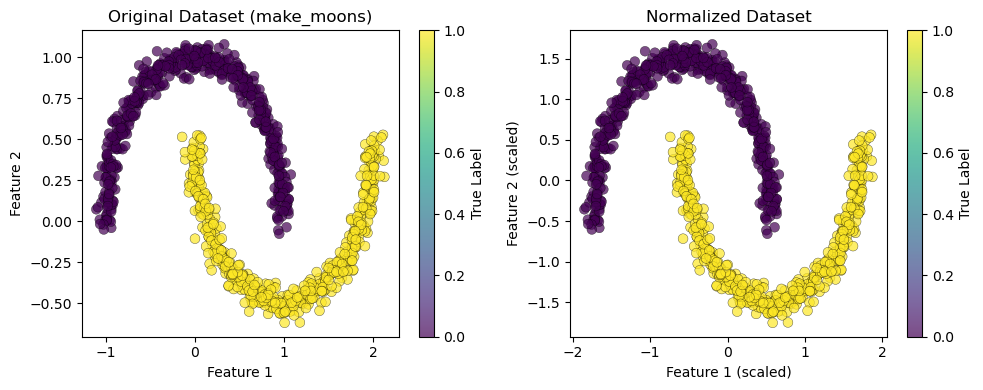


3. HDBSCAN DENGAN BERBAGAI PARAMETER
--------------------------------------------------------------------------------
min_cluster_size= 5, min_samples= 1 -> clusters=2, noise=  0 (  0.0%), Silhouette=0.3912, DBI=1.0186
min_cluster_size= 5, min_samples= 5 -> clusters=2, noise=  0 (  0.0%), Silhouette=0.3912, DBI=1.0186
min_cluster_size= 5, min_samples=10 -> clusters=2, noise=  0 (  0.0%), Silhouette=0.3912, DBI=1.0186
min_cluster_size=10, min_samples= 1 -> clusters=2, noise=  0 (  0.0%), Silhouette=0.3912, DBI=1.0186
min_cluster_size=10, min_samples= 5 -> clusters=2, noise=  0 (  0.0%), Silhouette=0.3912, DBI=1.0186
min_cluster_size=10, min_samples=10 -> clusters=2, noise=  0 (  0.0%), Silhouette=0.3912, DBI=1.0186
min_cluster_size=15, min_samples= 1 -> clusters=2, noise=  0 (  0.0%), Silhouette=0.3912, DBI=1.0186
min_cluster_size=15, min_samples= 5 -> clusters=2, noise=  0 (  0.0%), Silhouette=0.3912, DBI=1.0186
min_cluster_size=15, min_samples=10 -> clusters=2, noise=  0 (  0.0%), Si

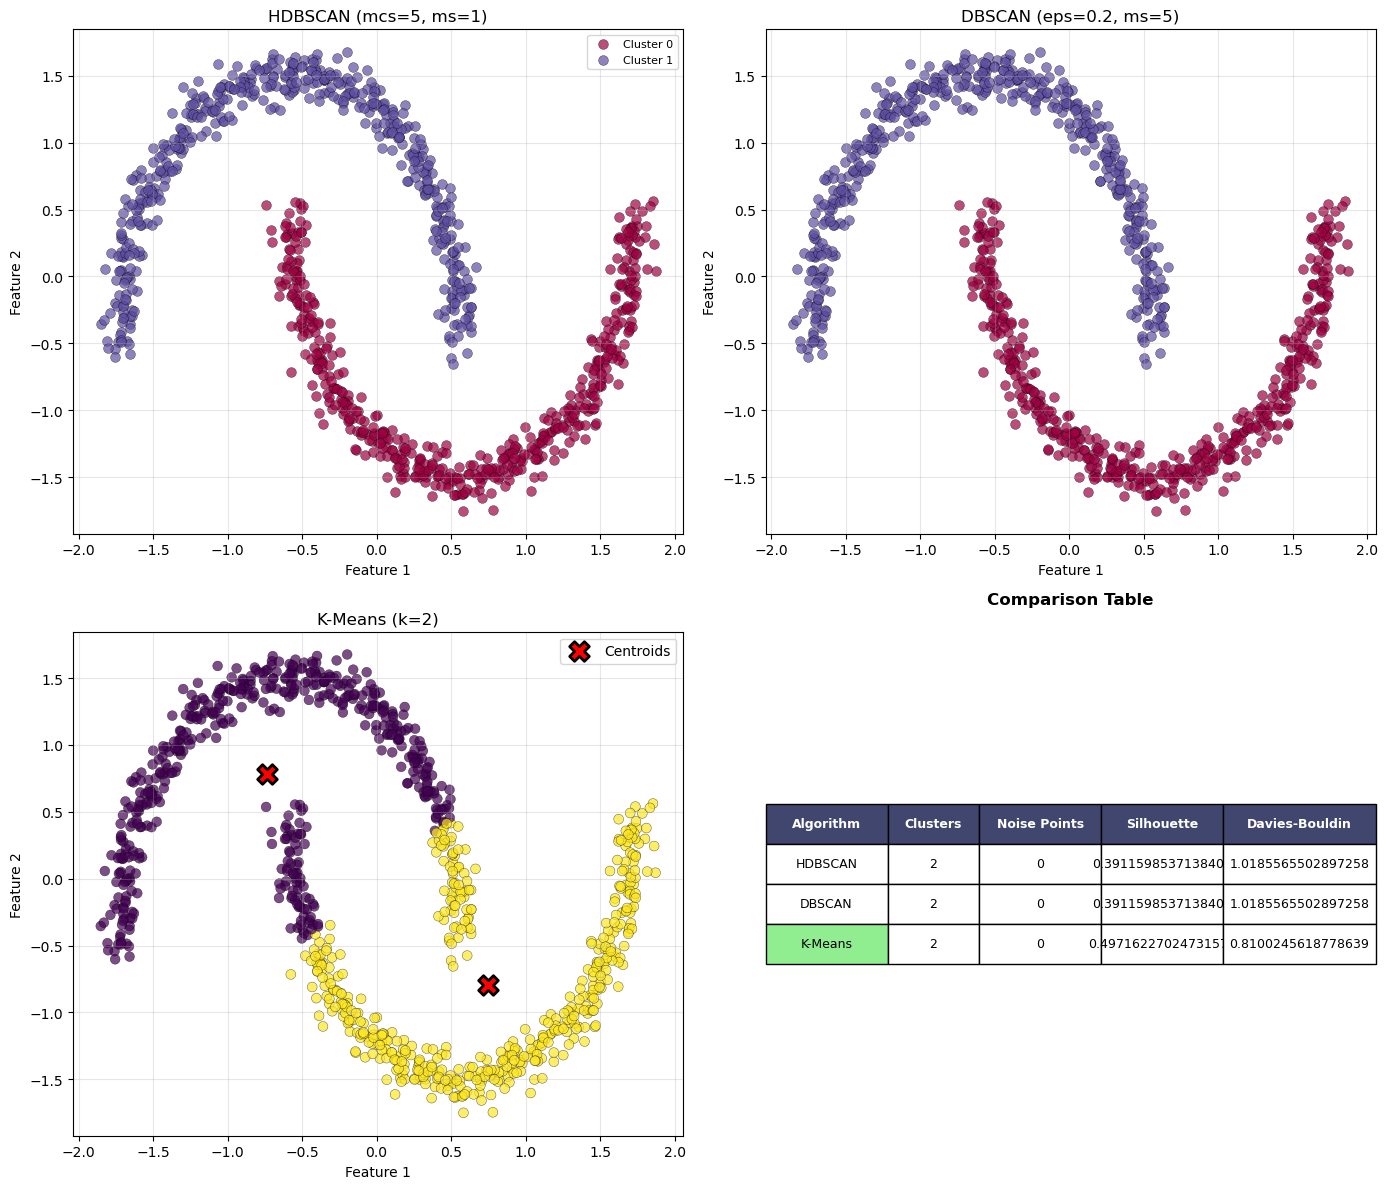


Tabel Perbandingan:
Algorithm  Clusters  Noise Points  Silhouette  Davies-Bouldin
  HDBSCAN         2             0    0.391160        1.018557
   DBSCAN         2             0    0.391160        1.018557
  K-Means         2             0    0.497162        0.810025

KESIMPULAN

HDBSCAN:
- Otomatis menentukan jumlah cluster
- Dapat menangani noise (outliers)
- Cocok untuk data dengan cluster berbentuk tidak teratur (seperti make_moons)
- Silhouette Score: 0.3912

DBSCAN:
- Perlu tuning parameter eps dan min_samples
- Dapat menangani noise
- Silhouette Score: 0.3912

K-Means:
- Harus tentukan jumlah cluster k di awal
- Tidak menangani noise
- Kurang cocok untuk cluster non-spherical
- Silhouette Score: 0.4972

WINNER: K-Means memberikan hasil terbaik untuk dataset ini!


In [ ]:
# Implementasi Tugas: Eksperimen HDBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Install hdbscan jika belum ada
try:
    import hdbscan
except ImportError:
    print("Installing hdbscan...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'hdbscan'])
    import hdbscan

print("="*80)
print("TUGAS: EKSPERIMEN HDBSCAN")
print("="*80)

# 1. Load dan eksplorasi dataset
print("\n1. LOAD DAN EKSPLORASI DATASET")
print("-"*80)

# Membuat dataset make_moons dengan noise
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)
print(f"Dataset: make_moons")
print(f"Jumlah sampel: {len(X)}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"True classes: {len(set(y_true))}")

# Visualisasi dataset asli
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7, edgecolors='k', linewidths=0.3)
plt.title('Original Dataset (make_moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='True Label')

# 2. Preprocessing
print("\n2. PREPROCESSING")
print("-"*80)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data telah dinormalisasi dengan StandardScaler")
print(f"Mean: {X_scaled.mean(axis=0)}")
print(f"Std: {X_scaled.std(axis=0)}")

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7, edgecolors='k', linewidths=0.3)
plt.title('Normalized Dataset')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='True Label')
plt.tight_layout()
plt.show()

# 3. Jalankan HDBSCAN dengan berbagai parameter
print("\n3. HDBSCAN DENGAN BERBAGAI PARAMETER")
print("-"*80)

min_cluster_sizes = [5, 10, 15, 20]
min_samples_values = [1, 5, 10]

hdbscan_results = []

for mcs in min_cluster_sizes:
    for ms in min_samples_values:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=mcs, min_samples=ms)
        labels = clusterer.fit_predict(X_scaled)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Evaluasi
        if n_clusters >= 2 and n_noise < len(X_scaled):
            mask = labels != -1
            sil = silhouette_score(X_scaled[mask], labels[mask]) if mask.sum() > 1 else 0
            dbi = davies_bouldin_score(X_scaled[mask], labels[mask]) if mask.sum() > 1 else 0
        else:
            sil = 0
            dbi = 0
        
        hdbscan_results.append({
            'min_cluster_size': mcs,
            'min_samples': ms,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_pct': n_noise/len(X_scaled)*100,
            'silhouette': sil,
            'davies_bouldin': dbi
        })
        
        print(f"min_cluster_size={mcs:2d}, min_samples={ms:2d} -> "
              f"clusters={n_clusters}, noise={n_noise:3d} ({n_noise/len(X_scaled)*100:5.1f}%), "
              f"Silhouette={sil:.4f}, DBI={dbi:.4f}")

# 4. Evaluasi hasil
print("\n4. EVALUASI HASIL")
print("-"*80)

df_hdbscan = pd.DataFrame(hdbscan_results)
print("\nTabel Hasil HDBSCAN:")
print(df_hdbscan.to_string(index=False))

# Pilih parameter terbaik (Silhouette tertinggi)
best_hdb = df_hdbscan.loc[df_hdbscan['silhouette'].idxmax()]
print(f"\nParameter Terbaik HDBSCAN (Silhouette tertinggi):")
print(f"  min_cluster_size: {best_hdb['min_cluster_size']:.0f}")
print(f"  min_samples: {best_hdb['min_samples']:.0f}")
print(f"  Silhouette Score: {best_hdb['silhouette']:.4f}")
print(f"  Davies-Bouldin Index: {best_hdb['davies_bouldin']:.4f} (lebih rendah lebih baik)")

# Jalankan dengan parameter terbaik
best_clusterer = hdbscan.HDBSCAN(
    min_cluster_size=int(best_hdb['min_cluster_size']), 
    min_samples=int(best_hdb['min_samples'])
)
best_labels = best_clusterer.fit_predict(X_scaled)

# 5. Visualisasi hasil clustering
print("\n5. VISUALISASI HASIL CLUSTERING")
print("-"*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# HDBSCAN result
unique_labels = set(best_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

ax = axes[0, 0]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (best_labels == k)
    xy = X_scaled[class_member_mask]
    ax.scatter(xy[:, 0], xy[:, 1], c=[col], s=50, alpha=0.7, 
               edgecolors='k', linewidths=0.3,
               label=f'Cluster {k}' if k != -1 else 'Noise')
ax.set_title(f'HDBSCAN (mcs={int(best_hdb["min_cluster_size"])}, ms={int(best_hdb["min_samples"])})')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='best', fontsize=8)
ax.grid(True, alpha=0.3)

# 6. Bandingkan dengan DBSCAN dan K-Means
print("\n6. PERBANDINGAN DENGAN DBSCAN DAN K-MEANS")
print("-"*80)

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
n_clusters_db = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_db = list(dbscan_labels).count(-1)
mask_db = dbscan_labels != -1
sil_db = silhouette_score(X_scaled[mask_db], dbscan_labels[mask_db]) if mask_db.sum() > 1 and n_clusters_db >= 2 else 0
dbi_db = davies_bouldin_score(X_scaled[mask_db], dbscan_labels[mask_db]) if mask_db.sum() > 1 and n_clusters_db >= 2 else 0

print(f"\nDBSCAN (eps=0.2, min_samples=5):")
print(f"  Clusters: {n_clusters_db}, Noise: {n_noise_db}")
print(f"  Silhouette: {sil_db:.4f}, DBI: {dbi_db:.4f}")

# K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
sil_km = silhouette_score(X_scaled, kmeans_labels)
dbi_km = davies_bouldin_score(X_scaled, kmeans_labels)

print(f"\nK-Means (k=2):")
print(f"  Clusters: 2, Noise: 0")
print(f"  Silhouette: {sil_km:.4f}, DBI: {dbi_km:.4f}")

# Visualisasi perbandingan
ax = axes[0, 1]
unique_labels_db = set(dbscan_labels)
colors_db = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_db))]
for k, col in zip(unique_labels_db, colors_db):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (dbscan_labels == k)
    xy = X_scaled[class_member_mask]
    ax.scatter(xy[:, 0], xy[:, 1], c=[col], s=50, alpha=0.7, edgecolors='k', linewidths=0.3)
ax.set_title(f'DBSCAN (eps=0.2, ms=5)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid(True, alpha=0.3)

ax = axes[1, 0]
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7, edgecolors='k', linewidths=0.3)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='red', marker='X', s=200, edgecolors='black', linewidths=2, label='Centroids')
ax.set_title('K-Means (k=2)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
ax.grid(True, alpha=0.3)

# Comparison table
comparison = pd.DataFrame({
    'Algorithm': ['HDBSCAN', 'DBSCAN', 'K-Means'],
    'Clusters': [int(best_hdb['n_clusters']), n_clusters_db, 2],
    'Noise Points': [int(best_hdb['n_noise']), n_noise_db, 0],
    'Silhouette': [best_hdb['silhouette'], sil_db, sil_km],
    'Davies-Bouldin': [best_hdb['davies_bouldin'], dbi_db, dbi_km]
})

ax = axes[1, 1]
ax.axis('off')
table_data = []
table_data.append(comparison.columns.tolist())
for idx, row in comparison.iterrows():
    table_data.append(row.tolist())

table = ax.table(cellText=table_data, cellLoc='center', loc='center', 
                 colWidths=[0.2, 0.15, 0.2, 0.2, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Header styling
for i in range(len(comparison.columns)):
    table[(0, i)].set_facecolor('#40466e')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Highlight best values
best_row = comparison['Silhouette'].idxmax() + 1
table[(best_row, 0)].set_facecolor('#90EE90')

ax.set_title('Comparison Table', fontweight='bold', fontsize=12, pad=20)

plt.tight_layout()
plt.show()

print("\nTabel Perbandingan:")
print(comparison.to_string(index=False))

print("\n" + "="*80)

if best_hdb['silhouette'] > sil_db and best_hdb['silhouette'] > sil_km:
    print("\nWINNER: HDBSCAN memberikan hasil terbaik untuk dataset ini!")
elif sil_db > best_hdb['silhouette'] and sil_db > sil_km:
    print("\nWINNER: DBSCAN memberikan hasil terbaik untuk dataset ini!")
else:
    print("\nWINNER: K-Means memberikan hasil terbaik untuk dataset ini!")

### KESIMPULAN
HDBSCAN:
- Otomatis menentukan jumlah cluster
- Dapat menangani noise (outliers)
- Cocok untuk data dengan cluster berbentuk tidak teratur (seperti make_moons)

DBSCAN:
- Perlu tuning parameter eps dan min_samples
- Dapat menangani noise

K-Means:
- Harus tentukan jumlah cluster k di awal
- Tidak menangani noise
- Kurang cocok untuk cluster non-spherical
